In [97]:
import StrategyLearner
from  ManualStrategy import ManualStrategy
from marketsimcode import compute_portvals 
import util as ut  	
import StrategyLearner_test

import datetime as dt 
import pandas as pd
import matplotlib.pyplot as plt 
import indicators as ind

import importlib
importlib.reload(StrategyLearner_test)

<module 'StrategyLearner_test' from '/Users/Ally.Zhang/Documents/VS Code/ML4T/strategy_evaluation/StrategyLearner_test.py'>

In [98]:
symbol="ML4T-220" 	

sd=dt.datetime(2008, 1, 1)		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
ed=dt.datetime(2009, 12, 31)  

tsd=dt.datetime(2010, 1, 1)		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
ted=dt.datetime(2011, 12, 31)  
sv=100000 	

In [99]:
def convert_trade(trades, symbol): 
    
    df_trade_strategy = pd.DataFrame(columns=['Date', 'Symbol', 'Order','Shares'])
    for i in range(len(trades)): 
        if trades.iloc[i][0] > 0.0: 
            data = {'Date': trades.index[i], 
                    'Symbol': symbol, 
                    'Order': "BUY", 
                    'Shares': abs(trades.iloc[i][0])}
            df_trade_strategy = df_trade_strategy.append(data, ignore_index=True)
            
        elif trades.iloc[i][0] < 0.0: 
            data = {'Date': trades.index[i], 
                    'Symbol': symbol, 
                    'Order': "SELL", 
                    'Shares': abs(trades.iloc[i][0])}          
            df_trade_strategy = df_trade_strategy.append(data, ignore_index=True)
    return df_trade_strategy

In [100]:
prices_insample =  ut.get_data([symbol], pd.date_range(sd, ed))[[symbol]]
prices_outsample =  ut.get_data([symbol], pd.date_range(tsd, ted))[[symbol]]


learner = StrategyLearner_test.StrategyLearner(verbose = False, impact = 0.000)
q_table = learner.add_evidence(symbol=symbol, sd=sd, ed=ed, sv=sv)

In [101]:
q_table

array([[21200.06280823, 17000.97198912, 16433.2961675 ],
       [15278.66785261, 16856.4339905 , 19234.17380031]])

In [62]:
import itertools
x = [1, 2, 3]
possible_states = [p for p in itertools.product(x, repeat=3)]

def convert_state(row): 
    return (row['price'] - 1) * 9 + (row['vol'] -1) * 3 + (row['bbp'] - 1)

possible_states = pd.DataFrame(possible_states).rename(columns={0:'price', 1:'vol', 2:'bbp'})
converted_states = pd.DataFrame(possible_states.apply(convert_state, axis=1))

possible_states= pd.concat([possible_states, converted_states], axis=1).rename(columns={0: "state"})

In [56]:
pd.DataFrame(q_table).join(possible_states).rename(columns={0: "short", 1: "cash", 2:"long"})

,short,cash,long,price,vol,bbp,state
0,3597.153706,3472.963545,3196.657364,1,1,1,0
1,0.000000,0.000000,0.000000,1,1,2,1
2,0.000000,0.000000,0.000000,1,1,3,2
3,0.000000,0.000000,0.000000,1,2,1,3
4,1746.122023,0.000000,0.000000,1,2,2,4
5,0.000000,0.000000,0.000000,1,2,3,5
6,0.000000,0.000000,0.000000,1,3,1,6
7,0.000000,0.000000,0.000000,1,3,2,7
8,0.000000,0.000000,0.000000,1,3,3,8
9,0.000000,0.000000,0.000000,2,1,1,9


In [102]:
learner_trades = learner.testPolicy(symbol=symbol, sd=sd, ed=ed, sv=sv)

In [103]:
learner_trades = convert_trade(learner_trades, symbol)

In [104]:
learner_trades

,Date,Symbol,Order,Shares
0,2008-01-02,ML4T-220,SELL,1000.0
1,2008-01-03,ML4T-220,BUY,2000.0
2,2008-01-24,ML4T-220,SELL,2000.0
3,2008-02-14,ML4T-220,BUY,2000.0
4,2008-03-07,ML4T-220,SELL,2000.0
5,2008-03-31,ML4T-220,BUY,2000.0
6,2008-04-21,ML4T-220,SELL,2000.0
7,2008-05-12,ML4T-220,BUY,2000.0
8,2008-06-03,ML4T-220,SELL,2000.0
9,2008-06-24,ML4T-220,BUY,2000.0


In [105]:
learner_insample = compute_portvals(learner_trades, start_val = sv, commission=0, impact=0.000, start=sd, end=ed)
price = ut.get_data([symbol], pd.date_range(sd, ed))[symbol]

In [75]:
history = dt.timedelta(100)
full_sd = sd - history
df_price_full = ut.get_data([symbol], pd.date_range(full_sd, ed))
df_price_full = df_price_full[[symbol]]
lookback = 60

sma_60 = ind.price_sma(sd, ed, symbol, lookback, df_price_full)
sma_30 = ind.price_sma(sd, ed, symbol, 15, df_price_full)
bbp = ind.bbp(sd, ed, symbol, lookback, df_price_full)
rsi = ind.rsi(sd, ed, symbol, lookback, df_price_full)
osi = ind.stochastic_osi(sd, ed, symbol, lookback, df_price_full)


In [106]:
learner = learner_insample/learner_insample[0]
price = price = price/price[0]

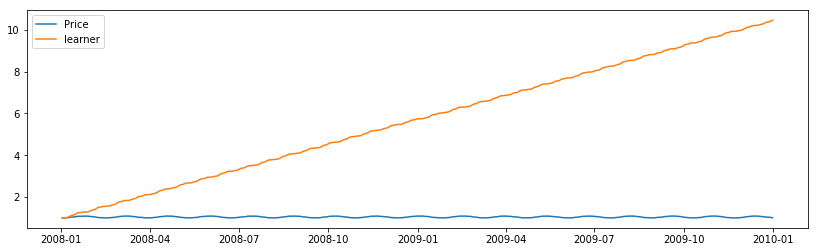

In [107]:
fig, ax = plt.subplots()
ax.plot(price, label='Price')
# ax.plot(sma_60, label="long")
# ax.plot(sma_30, label="short")

ax.plot(learner, label="learner")
ax.legend()
fig.set_figwidth(14)

In [108]:
df_state = sma_30 > sma_60

In [109]:
df_state.replace({True: 1, False: 0}, inplace=True)

In [110]:
df_state

,sma
2008-01-02,0
2008-01-03,1
2008-01-04,1
2008-01-07,1
2008-01-08,1
2008-01-09,1
2008-01-10,1
2008-01-11,1
2008-01-14,1
2008-01-15,1
